# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import scipy.stats as stats
import pylab

df = pd.read_csv('data/human_body_temperature.csv')

df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


Let's check if there are null value in dataframe.

In [19]:
df.isnull().sum() 

temperature    0
gender         0
heart_rate     0
dtype: int64

**Q1. Is the distribution of body temperatures normal?**

To determin whether body temperatures is normal, we can first use graphical methods.


Let's plot a normal curve with data to see how the normal curve actually differs


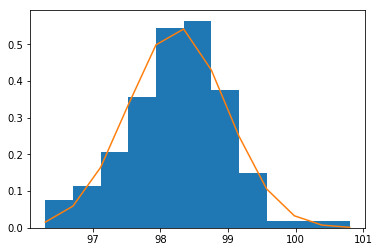

In [2]:
# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(len(df.temperature))

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# plot the empirical distribution of data. 
n, bins, patches = plt.hist(df.temperature, bins=n_bins, normed=1)

# plot the normal distribution with the same mean and variance as the sample
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))

We can see that hitogram follows a normal distribution



Draw qq-plot to check normality

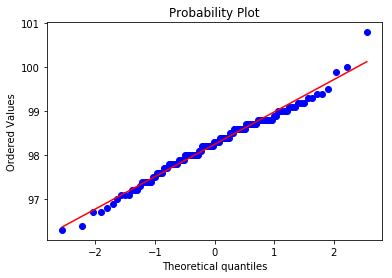

In [3]:
stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()

The points plotted in the QQ plot fall approximately on a straight line, indicating high positive correlation


Let's conduct normal test which is based on D’Agostino and Pearson’s

In [4]:
# normaltest tests a sample comes from a normal distribution. It returns chi squred statistics and p-value
#p value is a 2-sided chi squared probability for the hypothesis test.

x=df.temperature
stats.normaltest(x)


NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

As p-value is 0.25 we can not reject the null hypothesis that body temperature follows normal distribution. 



**Q2. Is the sample size large? Are the observations independent?**

In [5]:
df.shape

(130, 3)

Sample size is 130 which is greater than 30. 30 is considered to be sufficiently large. Therefore, sample size is large enough. 

The observations are independent since they were take from different people and they don't influence each other.

**Q3. Is the true population mean really 98.6 degrees F?**


First, try a bootstrap hypothesis test.


Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

In this situation, is it appropriate to use the  t  or  z statistic?

Now try using the other test. How is the result be different? Why?

H0: Mean of human body temperature = 98.6 

H1: Mean of human body temperature != 98.6 

In [6]:
np.mean(df.temperature)

98.24923076923078

The observed value of mean is 98.25. 

We need to perform a simulation under conditions in which we know the null hypothesis is true, mean of human body temprature = 98.6. 
So we shift dataset over so that the mean is 98.6. 

In [7]:
df_new = df.temperature - np.mean(df.temperature) + 98.6



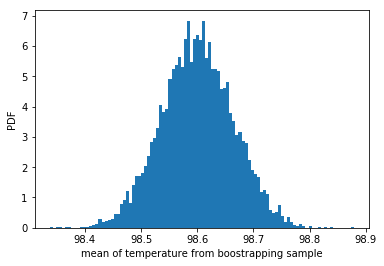

In [8]:
def draw_bs_reps(data, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(0,size):
        test = np.random.choice(data, size=len(data))
        bs_replicates[i] = np.mean(test)
    return bs_replicates        

# Draw 10,000 permutation replicates for both white sounding name and blakc sounding name
rep_mean = draw_bs_reps(df_new, 10000)

_ = plt.hist(rep_mean, bins=100, normed=True)
_ = plt.xlabel('mean of temperature from boostrapping sample')
_ = plt.ylabel('PDF')

# Show the plot
plt.show() 




The observed mean is 98.25. 
 
    
It is (98.6 - 98.25 = 0.35) units away from the null hypothesis. 
So our p-value is the probability of being more than 0.35 units away from 98.6 which is (98.6-0.35, 98.6+0.35) since it is two-sided test




In [9]:
ranges = 98.6 - np.mean(df.temperature)

p_value_boot = ( np.sum(rep_mean <(98.6-ranges)) + np.sum(  (rep_mean >98.6+ranges)   ) ) / 10000

print( p_value_boot)


0.0


The p-value from boostrapping approach is 0.0. So we can reject the null hypothesis that human body temperature is 98.6. 


Let's try frequentist statistical testing. We will use t-test instead of z-test as the population variance is unkown and sample distribution follows normal distribution. We use two-sided test since the alternative hypotesis is human body temparature is not equal to 98.6. 

In [10]:
stats.ttest_1samp(df.temperature, popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Since the p-value is close to 0, we can reject a null hypothesis. 

z test is not appropriate in this case since the population standard deviation is unkonwn. Let's substitue the population standard deviation with the standard error of the mean to compare t-test and z-test. 


In [11]:
# Calculate standard error of the mean:
sem = (np.std(df.temperature))/np.sqrt(len(df.temperature))

# Calculate and save z-statistic:
z = ( np.mean(df.temperature) - 98.6) / sem

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -5.475925202078116
p-value: 4.3523151658821886e-08


p-value for z-test is also close to 0.  p-values for boostraping, t-test and z-test are close to 0, therefore we can reject the null hypothesis. There is sufficient evidence to reject that Mean of human body temperature is 98.6. 



**Q4. Draw a small sample of size 10 from the data and repeat both frequentist tests.**

Which one is the correct one to use?

What do you notice? What does this tell you about the difference in application of the  t
t and  z statistic?

In [12]:
# Draw 10 samples from the data
sample = np.random.choice(df['temperature'], size=10)

np.mean(sample)

98.39

0.0024


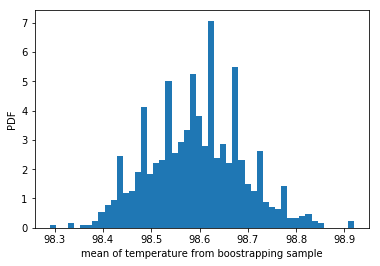

In [20]:


# Shift sample to make it mean "98.6"
sample_new = sample - np.mean(sample) + 98.6

# Boostrape 
rep_mean_sample = draw_bs_reps(sample_new, 1000)

ranges_sample = 98.6 - np.mean(sample)

p_value_boot_sample = ( np.sum(rep_mean_sample <(98.6-ranges_sample)) + np.sum(  (rep_mean_sample >98.6+ranges_sample)   ) ) / 10000

print( p_value_boot_sample)

_ = plt.hist(rep_mean_sample, bins=50, normed=True)
_ = plt.xlabel('mean of temperature from boostrapping sample')
_ = plt.ylabel('PDF')

# Show the plot
plt.show() 



In [14]:
# t-test

# Save results of a one sample t-test:
t = stats.ttest_1samp(sample, 98.6)[0]
p = stats.ttest_1samp(sample, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)


t-statistic: -2.1621544026218533
p-value: 0.05886066404252857


In [15]:
# z-test

# Calculate and save z-statistic:
z = (np.mean(sample) - 98.6) / (np.std(sample)/np.sqrt(len(sample)))

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -2.2791108550819317
p-value: 0.02266047640607915


P-value for  t test is 0.0080 and p-value for z-test is 0.0003. Therefore we can say that z-testis more appropriate with small number of data. 

**Q5. At what temperature should we consider someone's temperature to be "abnormal"?**

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.


In [16]:
# the critical value at 95% confidence:
z_critical = 1.96

n = len(df_new)

# Sample Standard Deviation:
s = np.std(df.temperature)/np.sqrt(n)

M = np.mean(df_new)

# Calculate and save the margin of error:
moe = z_critical * s
print('Margin of Error:', moe)

# Calculate and save the 95% prediction interval:
PI = np.array([M - moe, M + moe])
print('95% Prediction Interval:', PI)


Margin of Error: 0.125550964802579
95% Prediction Interval: [98.47444904 98.72555096]


We are considering it with one draw not N darw. so we need to use prediction interval instead of confidnece interval. 95% prediction inerval is from 97.168 to 100.0315. therefore any temperature not inside the prediction interval is abnormal. 

**Q6. Is there a significant difference between males and females in normal temperature?**

What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

I would use a two sample t test since the means of two independent samples are compared. 

In [17]:
# Save temperatures filtered by gender:
female_temp = df.temperature[df.gender == 'F']
male_temp = df.temperature[df.gender == 'M']

# Sample Means:
M_female = np.mean(female_temp)
M_male = np.mean(male_temp)

print('Female Sample Size:', len(female_temp), '\nFemale Temperature Mean:', M_female)
print('\nMale Sample Size:', len(male_temp), '\nMale Temperature Mean:', M_male)


Female Sample Size: 65 
Female Temperature Mean: 98.39384615384613

Male Sample Size: 65 
Male Temperature Mean: 98.1046153846154


We will test with 95% of significance leve. 

Null Hypothesis : 
    
    Mean of Female = Mean of Male
    
Alternative Hypothesis : 
    
    Mean of Female != Mean of Male

In [18]:
stats.ttest_ind(female_temp, male_temp)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

The p-value is 0.0239 which is smaller than 0,05. Therefore we can reject the null hypothesis. there is siginificant difference between males and females in normal temperature. 